# 01 - Adquisición de Datos: Dólar Observado BCCh

Este notebook descarga y procesa datos históricos del tipo de cambio USD/CLP desde el Banco Central de Chile.

## Objetivos
- Descargar 30 años de datos históricos (1995-2025)
- Procesar y guardar en formato CSV
- Verificar calidad de datos
- Generar resumen estadístico inicial

## 1. Setup y Configuración

In [1]:
import os
import sys

# Agregar src al path para importar módulos
sys.path.append(os.path.abspath('..'))

from src.data.fetch_bcch import fetch_dolar_observado
from src.data.preprocess import process_and_save

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [2]:
# Configurar credenciales (asegúrate de tener las variables de entorno configuradas)
# export BC_USER="tu_email@ejemplo.com"
# export BC_PASS="tu_contraseña"

# Verificar que estén configuradas
bc_user = os.environ.get('BC_USER')
bc_pass = os.environ.get('BC_PASS')

if bc_user and bc_pass:
    print(f"✓ Credenciales configuradas para: {bc_user}")
else:
    print("✗ ERROR: Credenciales no configuradas")

    print("Por favor configura las variables de entorno BC_USER y BC_PASS")

✓ Credenciales configuradas para: bastianberrios.a@gmail.com


## 2. Descarga de Datos

In [3]:
# Descargar datos de los últimos 30 años
try:
    print("Descargando datos del Banco Central de Chile...")
    print("Serie: F073.TCO.PRE.Z.D (Dólar observado diario)")
    print("Período: Últimos 30 años\n")
    
    data = fetch_dolar_observado(years_back=30, verbose=True)
    print("\n✓ Descarga completada exitosamente")
except Exception as e:
    print(f"\n✗ Error durante la descarga: {e}")
    raise

Descargando datos del Banco Central de Chile...
Serie: F073.TCO.PRE.Z.D (Dólar observado diario)
Período: Últimos 30 años

Consultando datos desde 1995-10-07 hasta 2025-10-06 con usuario bastianberrios.a@gmail.com...
Datos descargados exitosamente. Observaciones recibidas: 10956

✓ Descarga completada exitosamente


## 3. Procesamiento y Guardado

In [4]:
# Procesar JSON -> DataFrame -> CSV
try:
    print("\nProcesando datos...")
    df = process_and_save(data, verbose=True)
    print("✓ Procesamiento completado")
except Exception as e:
    print(f"✗ Error durante el procesamiento: {e}")
    raise


Procesando datos...
DataFrame creado con 10956 filas. Procesando...
Archivo guardado en: /home/bastianberrios/proyectos/dolar_ml/data/raw/dolar_bcch.csv

Archivo guardado en: /home/bastianberrios/proyectos/dolar_ml/data/raw/dolar_bcch.csv

Resumen: filas=10956, valores_no_nulos=7474, fecha_inicio=1995-10-09, fecha_fin=2025-10-06
status OK=7474, ND=3482

Información del DataFrame (verbose):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10956 entries, 1995-10-09 to 2025-10-06
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Valor       7474 non-null   float64
 1   statusCode  10956 non-null  object 
dtypes: float64(1), object(1)
memory usage: 256.8+ KB

Estadísticas descriptivas:
             Valor
count  7474.000000
mean    618.708097
std     146.557799
min     401.540000
25%     506.757500
50%     590.095000
75%     699.955000
max    1042.970000

Primeras 5 filas:
             Valor statusCode
Fecha          

## 4. Inspección Inicial de Datos

In [5]:
# Información general del DataFrame
print("\n" + "="*60)
print("INFORMACIÓN DEL DATASET")
print("="*60)
df.info()


INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10956 entries, 1995-10-09 to 2025-10-06
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Valor       7474 non-null   float64
 1   statusCode  10956 non-null  object 
dtypes: float64(1), object(1)
memory usage: 256.8+ KB


In [6]:
# Estadísticas descriptivas
print("\n" + "="*60)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
df.describe()


ESTADÍSTICAS DESCRIPTIVAS


,Valor
count,7474.000000
mean,618.708097
std,146.557799
min,401.540000
25%,506.757500
50%,590.095000
75%,699.955000
max,1042.970000


In [7]:
# Análisis de valores faltantes
print("\n" + "="*60)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)

total_rows = len(df)
missing_values = df['Valor'].isna().sum()
valid_values = df['Valor'].notna().sum()

print(f"Total de registros: {total_rows:,}")
print(f"Valores válidos: {valid_values:,} ({valid_values/total_rows*100:.2f}%)")
print(f"Valores faltantes (NaN): {missing_values:,} ({missing_values/total_rows*100:.2f}%)")

if 'statusCode' in df.columns:
    status_counts = df['statusCode'].value_counts()
    print("\nDistribución por statusCode:")
    print(status_counts)


ANÁLISIS DE VALORES FALTANTES
Total de registros: 10,956
Valores válidos: 7,474 (68.22%)
Valores faltantes (NaN): 3,482 (31.78%)

Distribución por statusCode:
statusCode
OK    7474
ND    3482
Name: count, dtype: int64


## 5. Visualización Inicial

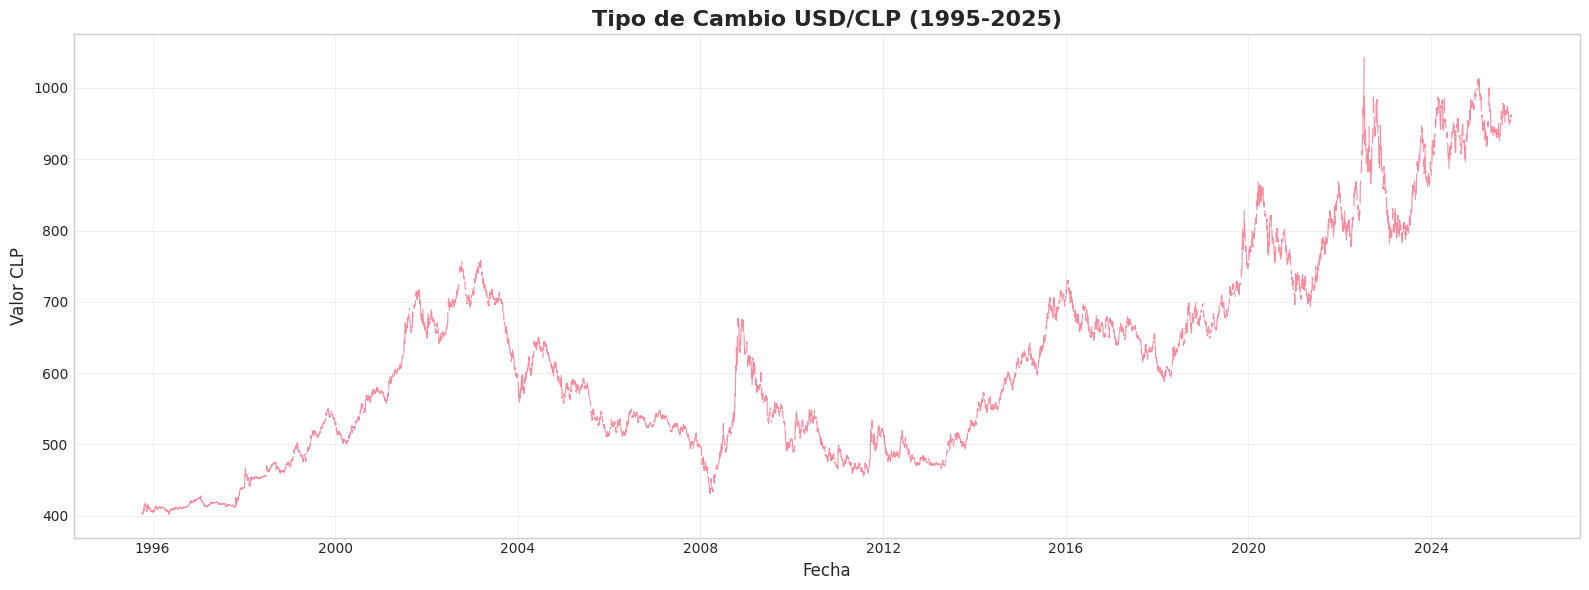


Valor mínimo histórico: $401.54 CLP
Valor máximo histórico: $1042.97 CLP
Valor actual (último): $963.17 CLP


In [8]:
# Gráfico de serie temporal completa
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Valor'], linewidth=0.8, alpha=0.8)
plt.title('Tipo de Cambio USD/CLP (1995-2025)', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor CLP', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nValor mínimo histórico: ${df['Valor'].min():.2f} CLP")
print(f"Valor máximo histórico: ${df['Valor'].max():.2f} CLP")
print(f"Valor actual (último): ${df['Valor'].iloc[-1]:.2f} CLP")

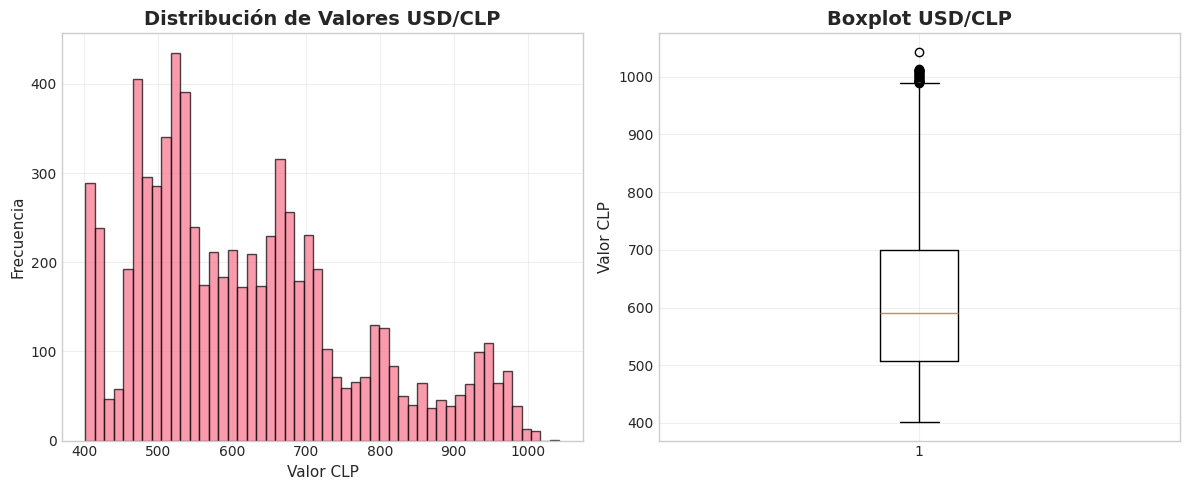

In [9]:
# Distribución de valores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Valor'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribución de Valores USD/CLP', fontsize=14, fontweight='bold')
plt.xlabel('Valor CLP', fontsize=11)
plt.ylabel('Frecuencia', fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['Valor'].dropna(), vert=True)
plt.title('Boxplot USD/CLP', fontsize=14, fontweight='bold')
plt.ylabel('Valor CLP', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Resumen Final

In [10]:
print("\n" + "="*60)
print("RESUMEN DE DESCARGA")
print("="*60)

print(f"\n✓ Datos descargados exitosamente")
print(f"✓ Archivo guardado en: data/raw/dolar_bcch.csv")
print(f"  Total de observaciones: {len(df):,}")
print(f"  Rango de fechas: {df.index.min().date()} a {df.index.max().date()}")
print(f"  Tamaño del archivo: {os.path.getsize('../data/raw/dolar_bcch.csv') / 1024:.2f} KB")

print("\n✓ Listo para continuar con el EDA (Análisis Exploratorio)")
print("  Siguiente notebook: 02_eda.ipynb")


RESUMEN DE DESCARGA

✓ Datos descargados exitosamente
✓ Archivo guardado en: data/raw/dolar_bcch.csv
  Total de observaciones: 10,956
  Rango de fechas: 1995-10-09 a 2025-10-06
  Tamaño del archivo: 203.65 KB

✓ Listo para continuar con el EDA (Análisis Exploratorio)
  Siguiente notebook: 02_eda.ipynb
